In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import Lasso
import time
from sklearn.svm import LinearSVR
import time
from sklearn.feature_selection import RFE

In [2]:
#Load the dataset
data=pd.read_csv("C:\\Users\\mo69fon\\Small_Molecules_SP\\SM+PD2.csv")
data

,Name,Solubility parameter,number of repeating units,Molecular weight,Connectivity index 0X,Connectivity index 1X,Connectivity index 0Xv,Connectivity index 1Xv,Quadrupole moment,Atomization energy (kJ/mol),...,AMW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,"2,2,3,3-tetramethylbutane",14.58,1,114.000,6.414214,3.457107,6.414214,3.457107,-41.98,10230.26,...,4.390033,14.062500,1.757812,0.000000,0.000000,0.0,58,9,4.844,38
1,"2,2,3-trimethylbutane",14.07,1,100.000,5.491564,3.127827,5.491564,3.127827,-36.86,9031.25,...,4.353270,12.293055,1.756151,0.000000,0.000000,0.0,42,6,4.238,30
2,"2,2-dimethyl-3-hexanol",19.31,1,130.000,6.905777,4.127827,6.352991,3.808676,-45.38,10653.67,...,4.819843,16.266070,1.807341,2.430904,2.430904,0.0,92,9,2.361,38
3,"2,2-dimethyl-3-pentanol",19.57,1,116.000,6.198671,3.627827,5.645884,3.308676,-40.05,9437.67,...,4.838338,14.275065,1.784383,2.396386,2.396386,0.0,63,8,1.792,34
4,"2,2-dimethylbutane",13.75,1,86.000,4.621320,2.707107,4.621320,2.707107,-31.76,7826.93,...,4.305478,10.465990,1.744332,0.000000,0.000000,0.0,28,3,3.730,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,2-methyl-3-pentanol,20.70,1,102.170,5.276021,3.304530,4.723234,2.985379,-35.58,8227.16,...,4.862117,12.505243,1.786463,2.394392,2.394392,0.0,46,6,1.397,26
311,3-methyl-2-pentanol,21.11,1,102.170,5.276021,3.304530,4.723234,2.985379,-34.75,8224.03,...,4.862117,12.505243,1.786463,2.348368,2.348368,0.0,46,6,1.608,26
312,4-methyl-2-pentanol,21.37,1,102.170,5.276021,3.287694,4.723234,2.968542,-36.18,8228.90,...,4.862117,12.509162,1.787023,2.353722,2.353722,0.0,48,4,1.819,26
313,"3,3-dimethyl-2-butanol",20.21,1,102.170,5.491564,3.127827,4.938777,2.808676,-34.78,8224.63,...,4.862117,12.293055,1.756151,2.327350,2.327350,0.0,42,6,1.434,30


In [3]:
# Remove descriptors with all 0 columns
newdata = data.loc[:, (data != 0).any(axis=0)]
print('----- after removing rows with only 0 -----')
print('new data shape:', newdata.shape)

----- after removing rows with only 0 -----
new data shape: (315, 1083)


In [4]:
# Define target values and variables
cols = list(newdata.columns)
x = newdata.iloc[:,2:]
y = newdata.iloc[:,1] 
paras = cols[2:]

In [5]:
#Convert it to a DataFrame
X = pd.DataFrame(x)

In [6]:
from sklearn.model_selection import train_test_split
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Fill NaN values with column means (using the mean of the training set)
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_train.mean())  # Use mean of training set to fill NaNs in test set

In [8]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
from sklearn.svm import SVR
# Apply RFE to reduce dimensionality
svr = SVR(kernel='linear')
rfe = RFE(estimator=svr, n_features_to_select=50, step=1)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

In [10]:
# Generate ranking for features
rfe_ranking = pd.DataFrame({'Descriptors': paras, 'Ranking': rfe.ranking_})
print(rfe_ranking.sort_values('Ranking'))

         Descriptors  Ranking
508       SpMin7_Bhv        1
315           GATS2c        1
309           MATS4s        1
965          MLFER_A        1
705            SwHBd        1
..               ...      ...
376          SM1_DzZ     1028
457          VE3_Dzs     1029
30             ATS6m     1030
89            AATS2v     1031
896  nHBAcc_Lipinski     1032

[1081 rows x 2 columns]


In [11]:
# Ensure rfe_ranking is correctly defined
rfe_ranking = pd.DataFrame({
    'Descriptors': paras,  # List of descriptors
    'Ranking': rfe.ranking_  # Rankings from RFE
})

# Filter the descriptors with ranking <= 50
selected_descriptors_svr = rfe_ranking[rfe_ranking['Ranking'] == 1]

# Display the selected descriptors
print(f"The {len(selected_descriptors_svr)} descriptors selected by RFE for SVR are:")
print(selected_descriptors_svr)
print(len(selected_descriptors_svr))

# Optionally, save the selected descriptors to a CSV file
selected_descriptors_svr.to_csv('rfe_svr_selected_50_descriptors.csv', index=False)

The 50 descriptors selected by RFE for SVR are:
          Descriptors  Ranking
1    Molecular weight        1
73              ATS4s        1
130            AATS7s        1
160            ATSC1e        1
179            ATSC2i        1
196           AATSC1c        1
204           AATSC0m        1
235           AATSC4p        1
268            MATS3m        1
309            MATS4s        1
315            GATS2c        1
338            GATS1e        1
339            GATS2e        1
340            GATS3e        1
350            GATS5p        1
381           VR2_DzZ        1
391           VE2_Dzm        1
406           VR1_Dzv        1
416           VE1_Dze        1
417           VE2_Dze        1
419           VR1_Dze        1
420           VR2_Dze        1
432           VR1_Dzp        1
433           VR2_Dzp        1
443           VE2_Dzi        1
455           VE1_Dzs        1
478        SpMax1_Bhm        1
482        SpMax5_Bhm        1
508        SpMin7_Bhv        1
547        SpMax6_Bhi 

In [12]:
# Define parameter grid for SVR
param_grid = {'C': np.arange(0.1, 5, 0.01)}

In [13]:
from sklearn.model_selection import KFold
# Initialize the SVR model
svr = SVR(kernel='linear')
# Define the K-fold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)


In [14]:
# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=kf, scoring='r2', n_jobs=-1)

In [15]:
# Fit the model on the training data
grid_search.fit(X_train_rfe, y_train)

,estimator,SVR(kernel='linear')
,param_grid,"{'C': array([0.1 , ..., 4.98, 4.99])}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,kernel,'linear'


In [16]:
num_runs=5
run_times_seconds=[]
for run in range(num_runs):
    start_time = time.time()
    grid_search.fit(X_train_rfe, y_train)
    end_time = time.time()
    elapsed_time_sec = end_time - start_time
    run_times_seconds.append(elapsed_time_sec)
    elapsed_time_min = elapsed_time_sec / 60
    print(f"Run {run + 1}: {elapsed_time_sec:.2f} seconds ({elapsed_time_min:.2f} minutes)")
    
# Compute average and std dev
avg_sec = np.mean(run_times_seconds)
std_sec = np.std(run_times_seconds)
avg_min = avg_sec / 60
std_min = std_sec / 60

# Final output
print(f"\nAverage training time: {avg_sec:.2f} seconds ({avg_min:.2f} minutes)")
print(f"Standard deviation: {std_sec:.2f} seconds ({std_min:.2f} minutes)")

Run 1: 12.82 seconds (0.21 minutes)
Run 2: 12.65 seconds (0.21 minutes)
Run 3: 12.67 seconds (0.21 minutes)
Run 4: 12.93 seconds (0.22 minutes)
Run 5: 12.89 seconds (0.21 minutes)

Average training time: 12.79 seconds (0.21 minutes)
Standard deviation: 0.11 seconds (0.00 minutes)


In [17]:
#Retrieve the best hyperparameters and the best estimator from the grid_search
best_params=grid_search.best_params_
grid_result = grid_search.best_estimator_

In [18]:
best_params

{'C': 1.1399999999999997}

In [19]:
grid_result

,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.1399999999999997
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [20]:
# Get the best model
best_model = grid_search.best_estimator_

In [21]:
# Make predictions
y_train_pred = best_model.predict(X_train_rfe)
y_test_pred = best_model.predict(X_test_rfe)

In [22]:
# Calculate metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

In [23]:
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

In [24]:
train_r2

0.9513641284396364

In [25]:
test_r2

0.8260466419056937

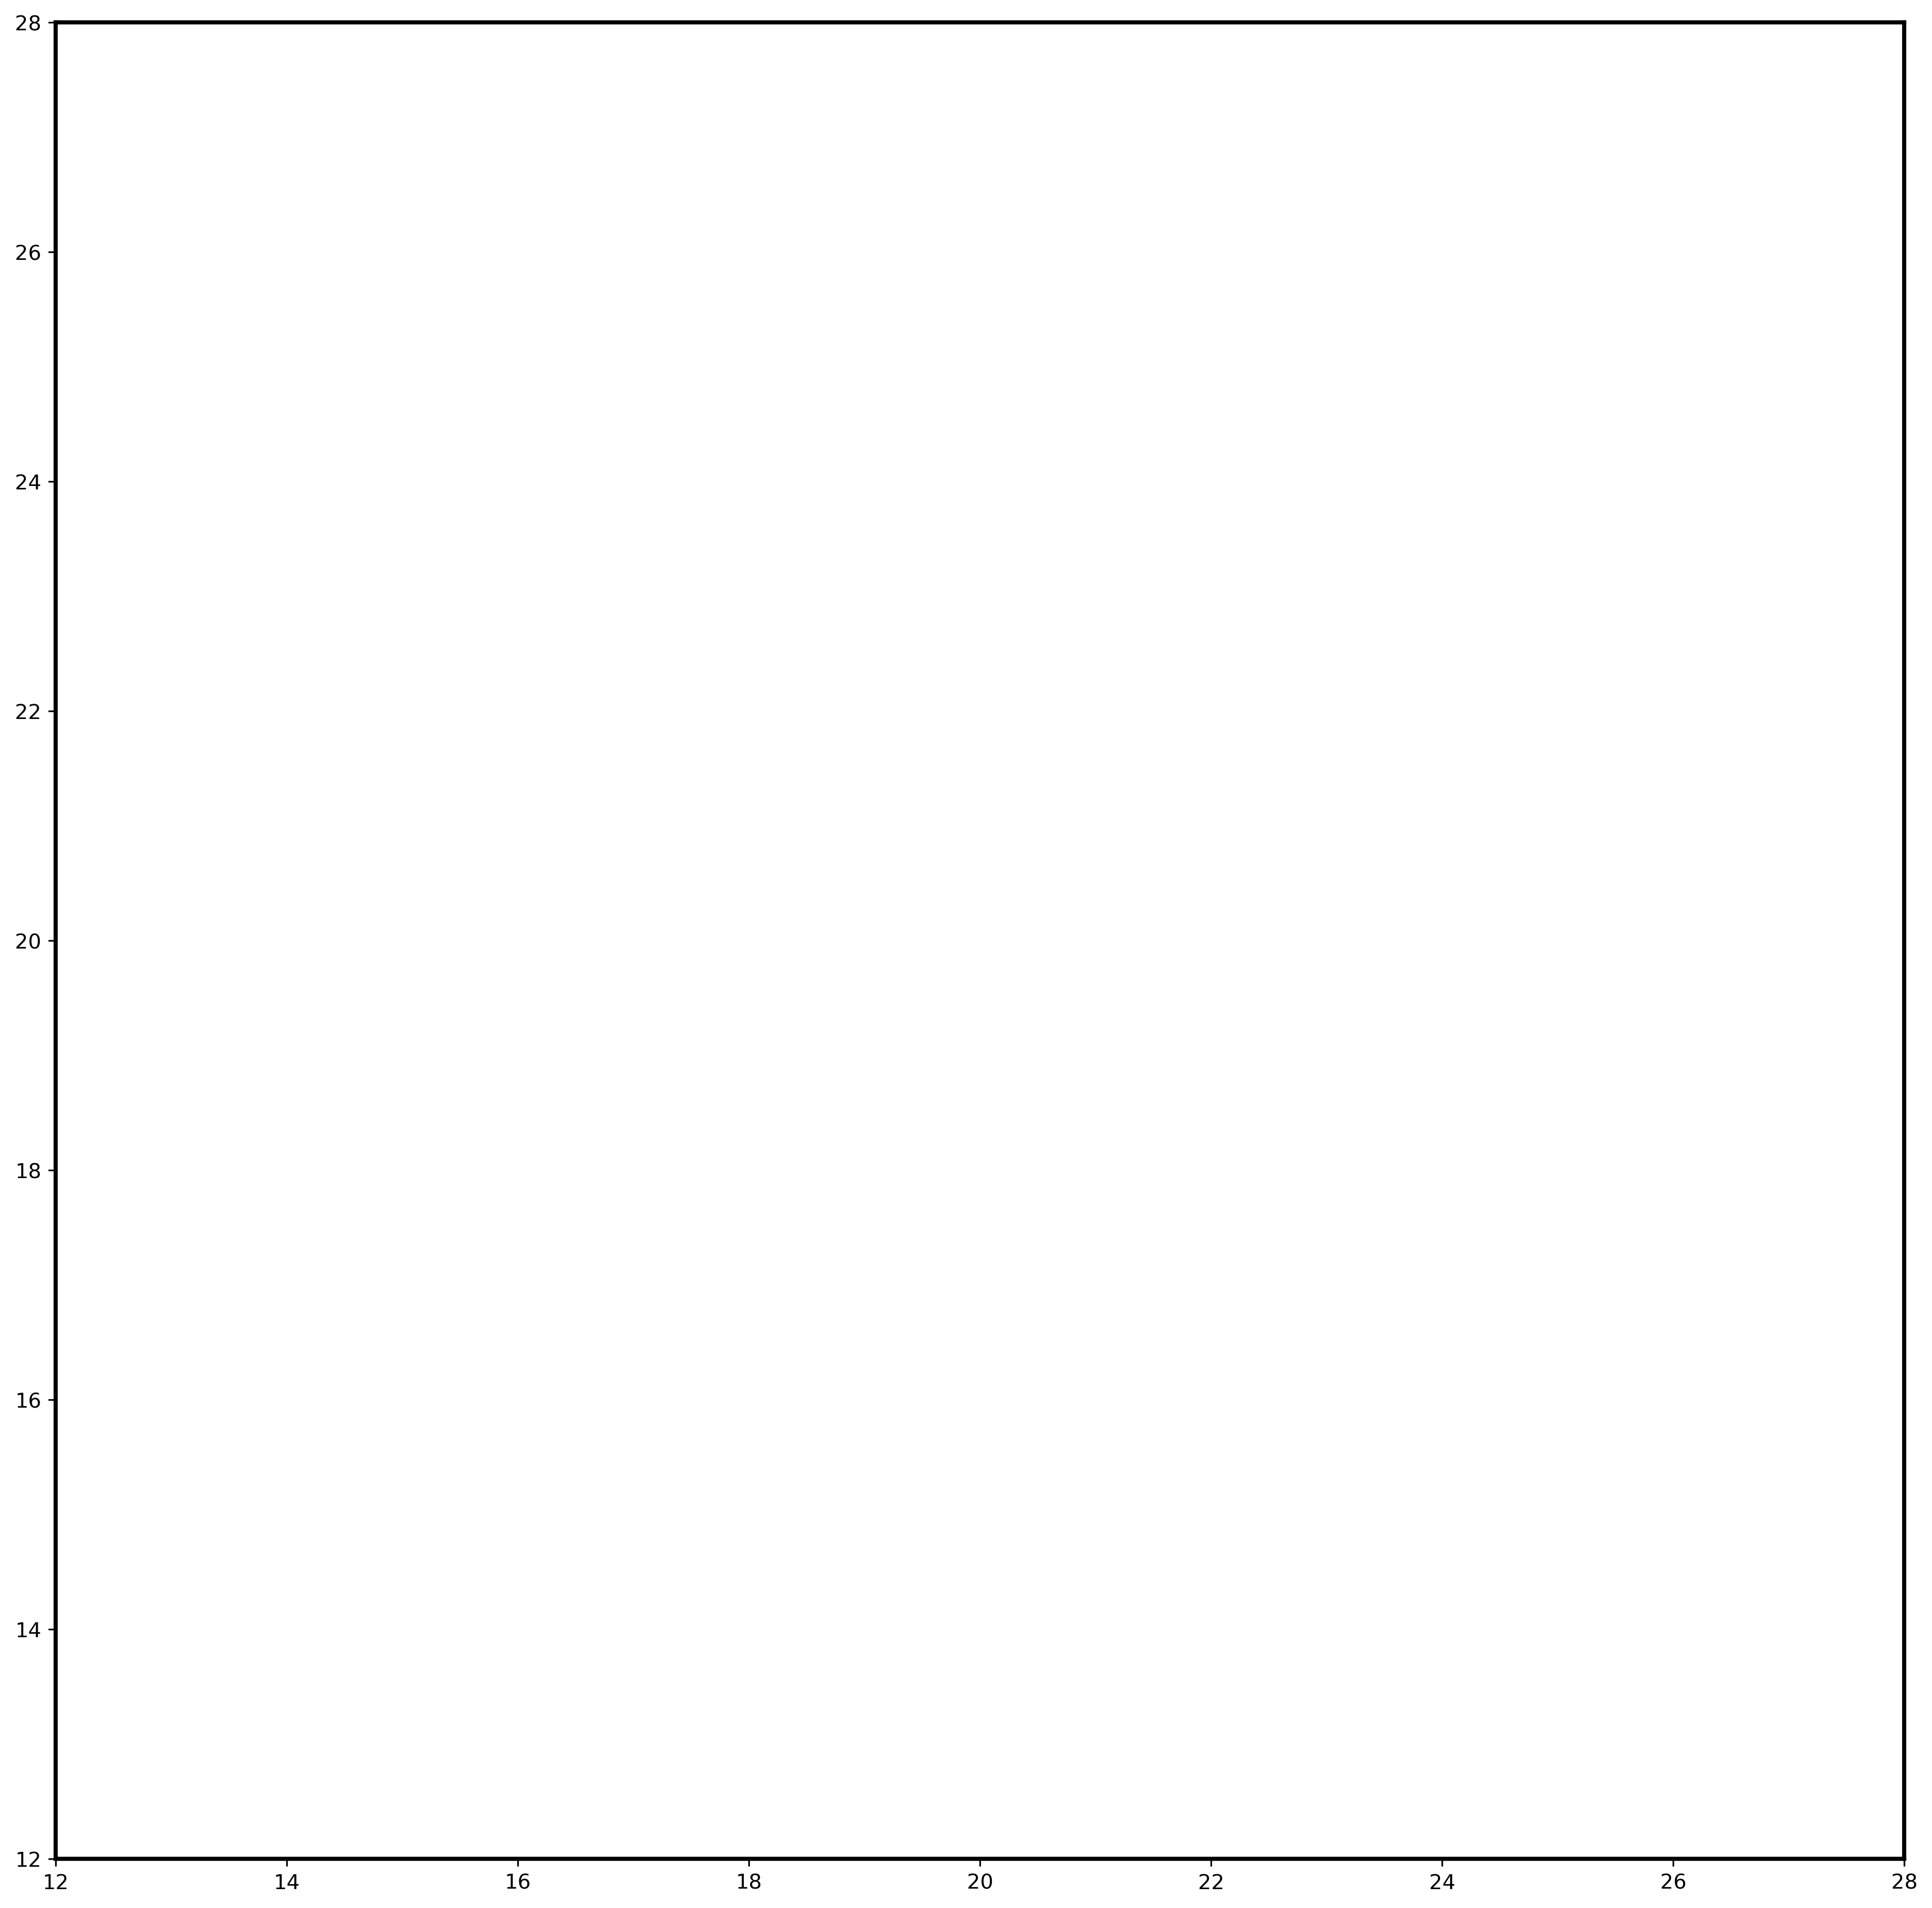

In [26]:
# Plot the predicted values versus the true values for the training and test sets
f, ax = plt.subplots(figsize=(16, 16),dpi=300)
plt.xlim((12, 28))
plt.ylim((12, 28))
ax.spines['bottom'].set_linewidth(2.0)
ax.spines['top'].set_linewidth(2.0)
ax.spines['right'].set_linewidth(2.0)
ax.spines['left'].set_linewidth(2.0)

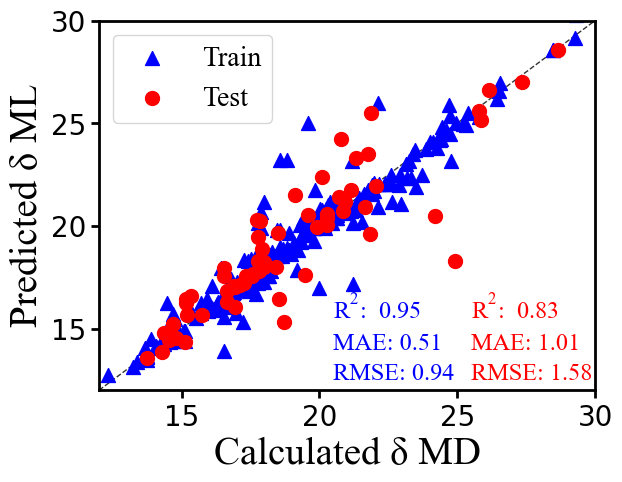

In [27]:
import matplotlib.pyplot as plt
orange_accent2 = (255/255, 192/255, 0/255)
plt.plot([12, 30], [12, 30], ls="--", c=".2", linewidth=1, zorder=1)
plt.scatter(y_train, y_train_pred, c='blue', marker='^', s=100, label='Train', zorder=2)
plt.scatter(y_test, y_test_pred, c='red', marker='o', s=100, label='Test', zorder=2)
plt.xlim(12, 30)
#plt.xticks([])
plt.ylim(12, 30)

# Set font properties
font_properties = {'family': 'Times New Roman', 'size': 28}

# Apply black border and customize ticks
plt.gca().spines['top'].set_linewidth(2)
plt.gca().spines['right'].set_linewidth(2)
plt.gca().spines['left'].set_color('black')
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['bottom'].set_linewidth(2)

# Increase tick size and label size
plt.tick_params(axis='both', which='major', labelsize=20, width=2, length=6)


plt.xlabel('Calculated δ MD',fontsize=28,family= 'Times New Roman')
plt.ylabel('Predicted δ ML',fontsize=28,family= 'Times New Roman')

# Legend
plt.legend(loc='upper left', prop={'size': 20, 'family': 'Times New Roman'})

plt.annotate("$\mathregular {{R^{{2}}}}$: {:5.2f}".format(test_r2),
        (22, 14), xytext=(25.5, 15.5),
        fontsize=17.5,family= 'Times New Roman',c='red')
plt.annotate("MAE:{:5.2f}".format(test_mae),
        (22, 14), xytext=(25.5, 14),
        fontsize=17.5,family= 'Times New Roman',c='red')
plt.annotate("RMSE:{:5.2f}".format(test_rmse),
        (22, 14), xytext=(25.5, 12.5),
        fontsize=17.5,family= 'Times New Roman',c='red')
plt.annotate("$\mathregular {{R^{{2}}}}$: {:5.2f}".format(train_r2),
        (22, 14), xytext=(20.5, 15.5),
        fontsize=17.5,family= 'Times New Roman',c='blue')
plt.annotate("MAE:{:5.2f}".format(train_mae),
        (22, 14), xytext=(20.5, 14),
        fontsize=17.5,family= 'Times New Roman',c='blue')
plt.annotate("RMSE:{:5.2f}".format(train_rmse),
        (22, 14), xytext=(20.5, 12.5),
        fontsize=17.5,family= 'Times New Roman',c='blue')
#plt.title('RFE_SVR',x=0.5,y=1.01,fontsize=25,family= 'Times New Roman')
#plt.savefig('SVR_RFE_paper.png', bbox_inches='tight', dpi=800)
plt.show()

In [28]:
# output scores and best parameters
print("Train R2 Score:", train_r2)
print("Test R2 Score:", test_r2)
print("Train MAE Score:", train_mae)
print("Test MAE Score:", test_mae)
print("Train RMSE Score:", train_rmse)
print("Test RMSE Score:", test_rmse)
print('best_params_')
print(best_params)

Train R2 Score: 0.9513641284396364
Test R2 Score: 0.8260466419056937
Train MAE Score: 0.5147432672961355
Test MAE Score: 1.0090155210457394
Train RMSE Score: 0.9370688479411446
Test RMSE Score: 1.580401764558989
best_params_
{'C': 1.1399999999999997}
